In [109]:
import os
import numpy as np
import pandas as pd
from scipy import signal

%run -i initialize_dataset.py

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [110]:
qualified_subject_list = [1,13,14,15,20,21,22,23,24,25,27,28,29,31,32,34,35, \
                          36,37,38,40,42,43,44,45,46,47,48,49,5,51,52,54,55, \
                          56,57,58,60,61,62,63,64,65,68,69,7,70,71,72,73,74, \
                          75,76,78,79,80,81,82,83,84,85,86,91,92,93,94,95,97]
unqualified_subject_list = [10,11,12,16,17,18,19,26,3,30,4,41,50,53,59,66,67,8,9]
qualified_df = initialize_dataset([1])
qualified_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1194,1195,1196,1197,1198,1199,index,trial,subject,label
0,-0.198291,0.335677,-0.560790,-0.056042,0.460231,0.271119,-0.645892,0.198804,-0.195651,0.297210,...,-0.631916,0.230288,0.248417,1.132345,-0.644564,0.088886,1,1,1,0
1,-0.189943,0.271573,-0.619751,0.002192,0.641092,0.133816,-0.750997,0.176938,-0.187401,0.288043,...,-0.634764,0.148129,0.282238,1.318643,-0.604922,-0.001406,2,1,1,0
2,-0.184502,0.379380,-0.672674,0.009918,0.771438,0.130728,-0.841463,0.070525,-0.184722,0.450381,...,-0.625142,0.051332,0.342873,1.523454,-0.565871,-0.101689,3,1,1,0
3,-0.189434,0.625194,-0.713933,-0.026794,0.825755,0.219983,-0.898032,-0.079724,-0.194003,0.719497,...,-0.601290,-0.024249,0.417298,1.612900,-0.525939,-0.142601,4,1,1,0
4,-0.206954,0.895620,-0.740522,-0.075082,0.784471,0.381093,-0.905343,-0.217131,-0.214815,0.967245,...,-0.563183,-0.051133,0.476871,1.493517,-0.478533,-0.085303,5,1,1,0


In [111]:
data = qualified_df.drop(columns=["index","trial","subject","label"]).iloc[0].to_numpy()
data = np.reshape(data, (150, 8))

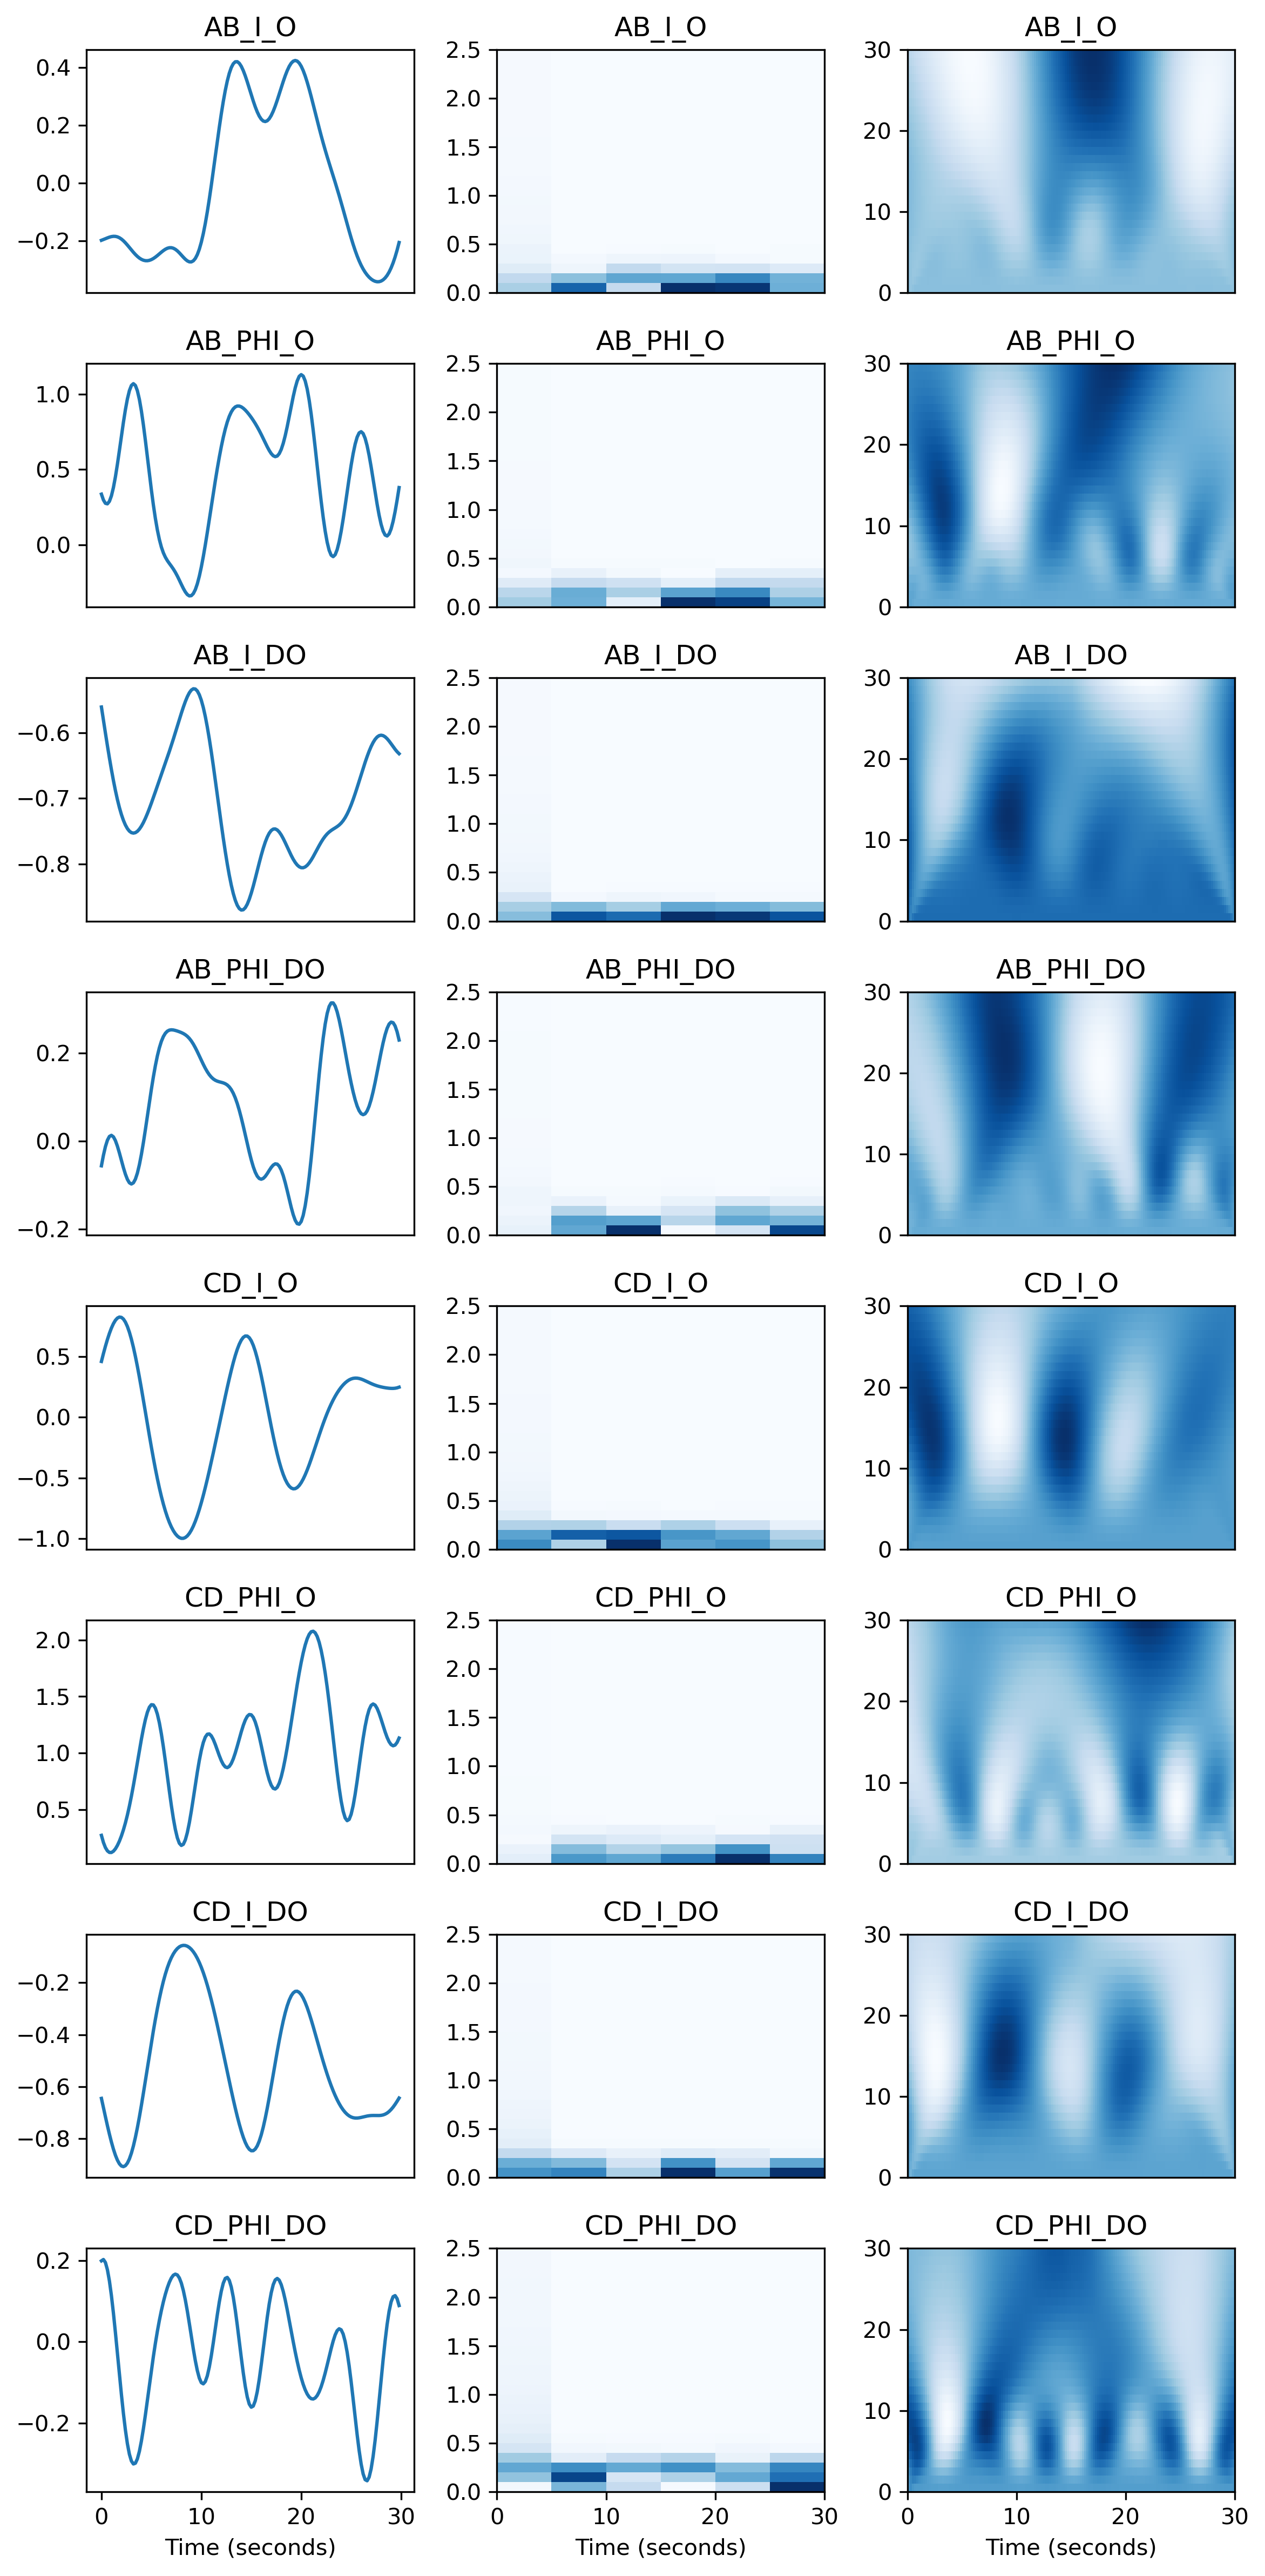

In [118]:
domains = ["Time","Frequency","Wavelet"]
features = ["AB_I_O","AB_PHI_O","AB_I_DO","AB_PHI_DO","CD_I_O","CD_PHI_O","CD_I_DO","CD_PHI_DO"]
fig, axs = plt.subplots(8, 3, figsize=(8,16,), dpi=300)
for idx, subfig in enumerate(fig.axes):
    row = int(idx/3)
    column = int(idx%3)
    axs[row][column].set_title("{}".format(features[row]))
    # remove xticks for all rows < 7
    if row < 7:
        axs[row][column].set_xticks([])
    # time domain
    if idx%3==0:
        axs[row][column].plot(data[:,row])
    # frequency domain
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
    elif idx%3==1:
        f, t, Zxx = signal.stft(data[:,row], fs=5, nperseg=50)
        axs[row][column].pcolormesh(t, f, np.abs(Zxx), cmap="Blues")
    # wavelet domain
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html
    else:
        widths = np.arange(1, 31)
        cwtmatr = signal.cwt(data[:,row], signal.ricker, widths)
        axs[row][column].pcolormesh(cwtmatr, cmap="Blues")
# time domain xaxis
axs[7][0].set_xticks([0,50,100,150])
axs[7][0].set_xticklabels([0,10,20,30])
# wavelet domain
axs[7][2].set_xticklabels(np.arange(0,7)*10)
axs[7][2].set_xlim([0,150])
# xlabel for all columns
for idx in range(3):
    axs[7][idx].set_xlabel("Time (seconds)")
fig.tight_layout()
plt.show()